In [248]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from datetime import datetime

# Presentation of Data

In [249]:
df = pd.read_csv("./test_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   185 non-null    object 
 1   state_code           185 non-null    object 
 2   latitude             185 non-null    float64
 3   longitude            185 non-null    float64
 4   zip_code             185 non-null    object 
 5   city                 185 non-null    object 
 6   name                 185 non-null    object 
 7   foundation_date      185 non-null    object 
 8   first_funding_date   185 non-null    object 
 9   last_funding_date    185 non-null    object 
 10  first_funding_age    185 non-null    float64
 11  last_funding_age     185 non-null    float64
 12  first_milestone_age  162 non-null    float64
 13  last_milestone_age   162 non-null    float64
 14  connections          185 non-null    int64  
 15  funding_rounds       185 non-null    int

In [250]:
df.head()

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,is_ecommerce,is_biotech,is_consulting,is_othercategory,roundA,roundB,roundC,roundD,avg_group_size,in_Top500
0,c:904,CA,33.095680,-117.244034,92009,Carlsbad,BrightQube,10/1/2006,5/1/2007,5/27/2008,...,1,0,0,0,1,0,0,0,1.0,1
1,c:64694,CA,34.019657,-118.487549,90401,Santa Monica,ServiceMesh,1/1/2008,11/16/2011,11/16/2011,...,0,0,0,0,0,0,0,0,1.0,1
2,c:1923,CA,37.788266,-122.403865,94108,San Francisco,Lookery,8/1/2007,2/7/2008,9/4/2008,...,0,0,0,0,1,0,0,0,11.5,1
3,c:152560,CA,37.779281,-122.419236,94109,San Francisco,Wantful,1/1/2011,3/20/2012,3/20/2012,...,1,0,0,0,1,0,0,0,8.0,1
4,c:71639,CA,38.021489,-122.519998,94903,San Rafael,Zep Solar,1/1/2009,11/20/2013,11/20/2013,...,0,0,0,1,1,0,0,0,1.0,0


# Presentation of Statistics

In [251]:
df.describe()

,latitude,longitude,first_funding_age,last_funding_age,first_milestone_age,last_milestone_age,connections,funding_rounds,total_funding,milestones,...,is_ecommerce,is_biotech,is_consulting,is_othercategory,roundA,roundB,roundC,roundD,avg_group_size,in_Top500
count,185.000000,185.000000,185.000000,185.000000,162.000000,162.000000,185.000000,185.000000,1.850000e+02,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,38.353036,-106.431156,2.247569,3.955084,2.909009,4.568756,7.735135,2.324324,1.759276e+07,1.886486,...,0.032432,0.027027,0.005405,0.372973,0.486486,0.372973,0.237838,0.075676,3.009010,0.789189
std,4.023591,21.964919,2.387700,2.782201,2.874208,2.978603,6.473198,1.376315,2.353837e+07,1.217214,...,0.177626,0.162602,0.073521,0.484907,0.501174,0.484907,0.426915,0.265196,2.045969,0.408991
min,25.752358,-122.674195,-1.000000,-0.115100,-7.005500,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,37.368830,-122.247573,0.465800,1.665800,0.686950,2.395900,3.000000,1.000000,2.250000e+06,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,37.755068,-118.878852,1.309600,3.602700,2.342450,4.352050,6.000000,2.000000,9.807367e+06,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,40.729839,-87.686634,3.786300,5.731500,4.919150,6.567800,10.000000,3.000000,2.490000e+07,3.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000
max,59.335232,18.057121,11.145200,11.145200,10.750700,11.874000,35.000000,7.000000,1.480000e+08,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.500000,1.000000


In [252]:
numerics = ['int64', 'float64']
df.select_dtypes(include=numerics).skew()

latitude                0.772549
longitude               1.568565
first_funding_age       1.203454
last_funding_age        0.628019
first_milestone_age     0.382130
last_milestone_age     -0.052708
connections             1.597376
funding_rounds          1.156060
total_funding           2.673773
milestones              0.384187
in_CA                  -0.434848
in_NY                   2.456678
in_MA                   3.756300
in_TX                   4.527920
in_otherstate           1.693994
is_software             2.222008
is_web                  2.022109
is_mobile               3.094606
is_enterprise           3.235052
is_advertising          3.562508
is_gamesvideo           3.562508
is_ecommerce            5.322157
is_biotech              5.881126
is_consulting          13.601471
is_othercategory        0.529649
roundA                  0.054517
roundB                  0.529649
roundC                  1.241594
roundD                  3.235052
avg_group_size          1.336245
in_Top500 

# Removing Unnessesery Attributes 

The category attribute include all the other category type attributes like "is_typeOfCategory" therefore we chose to remove those attributes because we only need the category attribute

In [253]:
df = df.drop(['is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
             'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory'] , axis='columns')

Same as category the state_code attribute include all the other city type attributes like "is_statecode" therefore we removed those attributes

In [254]:
df = df.drop(['in_CA', 'in_TX', 'in_NY', 'in_MA', 'in_otherstate'] , axis='columns')


Now, funding_age and funding_date are the same things given the foundation date, so we will drop the funding date attributes because working with the age from when the startup was founded does not affected by the current date

In [255]:
df = df.drop(['first_funding_date', 'last_funding_date'] , axis='columns')

We will drop the id and name attributes as they do not contribute any additional data about the startup.

In [256]:
df = df.drop(['id', 'name'], axis='columns')

We will drop thezip_code attribute as we have the latitude and longitude that pin point exactly to the wanted location

In [257]:
df = df.drop('zip_code', axis='columns')

# visualizations of data

we will present all the attributs distribution and fix the outliers in the next section

In [258]:
# numerics = ['int64', 'float64']
# df_numeric = df.select_dtypes(include=numerics)
# df_numeric['Target'] = df['Target'].astype('category').cat.codes

# fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), sharex=False, sharey=False)
# axes = axes.ravel()  # array to 1D
# cols = df_numeric.columns[:-1]  # create a list of dataframe columns to use

# for col, ax in zip(cols, axes):
#     data = df_numeric[[col, 'Target']]  # select the data
#     sns.histplot(data=data, x=col, hue='Target', fill=True, ax=ax)
#     ax.set(title=f'{col}', xlabel=None)
    
# fig.tight_layout()

# Data cleaning and Data reduction

We saw that the total founding attribute had a high skewness and by the graph of its distribution we saw that there was a small amount of very high values, so we dicided to remove this outliers

In [259]:
# df = df.drop(df.loc[(df['total_funding']>1e8)].index)
# sns.histplot(data=df, x='total_funding',  hue='Target')
# # sns.histplot(data=df, x='total_funding')
# df.info()

Now, we will just make sure that the last's ages are above the fisrt's ages and remove those who arent

In [260]:
# df = df.drop(df.loc[df['last_funding_age'] < df['first_funding_age']].index)
# df = df.drop(df.loc[df['last_milestone_age'] < df['first_milestone_age']].index)
# df.info()

We noticed with the describe function that there is no negitive data that doesn't make sence.
But we still have to check that there is no date's data that doesn't make sence.

In [261]:
# invalid_rows = []   
# date_columns = ['foundation_date']
# for index, row in df.iterrows():
#     for column in date_columns:
#         try:
#             date_value = pd.to_datetime(row[column], format='%d/%m/%Y', errors='raise')
#         except ValueError:
#             invalid_rows.append(index)
#             break
# df = df.drop(invalid_rows)
# df.info()

we will check any attriutes

We will show a nice scatter plot of the map of the startups 

In [262]:
# sns.scatterplot(data=df, x='longitude', y='latitude', hue='Target', palette=["green", "red"])
# # sns.scatterplot(data=df, x='longitude', y='latitude')

We will remove the blue outlier we can see in approx. (0,50)

In [263]:
# df = df.drop(df.loc[(df['latitude'] > 50) | (df['longitude'] > -60)].index)
# sns.scatterplot(data=df, x='longitude', y='latitude', hue='Target', palette=["green", "red"])
# # sns.scatterplot(data=df, x='longitude', y='latitude')
# df.info()

We will check for abnormal values, by checking abnormality of 5 std

In [264]:
# filtered_df = pd.DataFrame()
# numerics = ['int64', 'float64']
# df_numeric = df.select_dtypes(include=numerics)
# col_list = df_numeric.columns
# for col in col_list:
#     col_mean = df[col].mean()
#     col_std = df[col].std()
#     lower_bound = col_mean - 5 * col_std
#     upper_bound = col_mean + 5 * col_std
#     column_filter = (df[col] > upper_bound) | (df[col] < lower_bound)
#     column_filter &= ~df[col].isna()
#     filtered_df = pd.concat([filtered_df, df[column_filter]], ignore_index=True)
# filtered_df

We noticed that its only a small portion of the data so we decided to delete it 

In [265]:
# numerics = ['int64', 'float64']
# df_numeric = df.select_dtypes(include=numerics)
# col_list = df_numeric.columns
# for col in col_list:
#     col_mean = df[col].mean()
#     col_std = df[col].std()
#     lower_bound = col_mean - 5 * col_std
#     upper_bound = col_mean + 5 * col_std
#     column_filter = (df[col] <= upper_bound) & (df[col] >= lower_bound) | df[col].isna()
#     df = df[column_filter]
# df.info()

# Data transformation

we will convet the date's data that does make sence into integers which represent how many nanoseconds passed sence 1/1/1970

In [266]:
df['foundation_date'] = pd.to_datetime(df['foundation_date'])
min_date = df['foundation_date'].min()
df['foundation_date'] = (df['foundation_date'] - min_date).dt.days

We noticed that the missing milestone age values are becuase there are no milestones so we dicided to fill them with zeros so PCA will work on them and we will still be able to classify which startups didn't have milestones 

In [267]:
df['first_milestone_age'] = df['first_milestone_age'].fillna(0)
df['last_milestone_age'] = df['last_milestone_age'].fillna(0)

We will normalize the numeric attributes to values between 0 to 1 by min-max approach 

In [268]:
# attributes_list = ['Target', 'category', 'city', 'state_code', 'foundation_date']
attributes_list = ['category', 'city', 'state_code', 'foundation_date']
numerics = ['int64', 'float64']
new_df_numeric = df.select_dtypes(include=numerics)
normalized_df = (new_df_numeric - new_df_numeric.min()) / (new_df_numeric.max() - new_df_numeric.min())
print("size is :", normalized_df.shape)
for attr in attributes_list:
    normalized_df[attr] = df[attr]
print(normalized_df.shape)

size is : (185, 17)
(185, 20)


In the category attribute there are many type of categorys so we chose to leave only the 8 most common categories and the others convert to "other category"

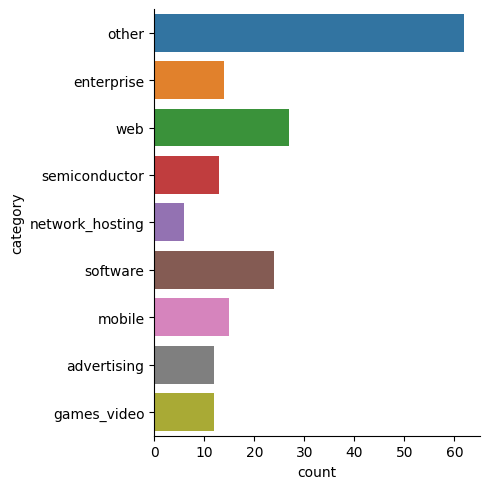

In [269]:
list1 = normalized_df['category'].value_counts().index.tolist()
normalized_df['category'].replace(list1[8:], 'other', inplace=True)
normalized_df['category'].value_counts()
# sns.catplot(data=normalized_df, y='category', hue= 'Target', kind='count')
sns.catplot(data=normalized_df, y='category', kind='count')

We changed the category attribute from string to int

In [270]:
normalized_df['category'] = pd.factorize(normalized_df['category'])[0]
normalized_df['category'].value_counts()

category
0    62
2    27
5    24
6    15
1    14
3    13
7    12
8    12
4     6
Name: count, dtype: int64

So as in the city and the state_code attributes there are many type of them so we chose to leave only the 10 most common state_codes and the 20 most common cities and convert the other to "other"

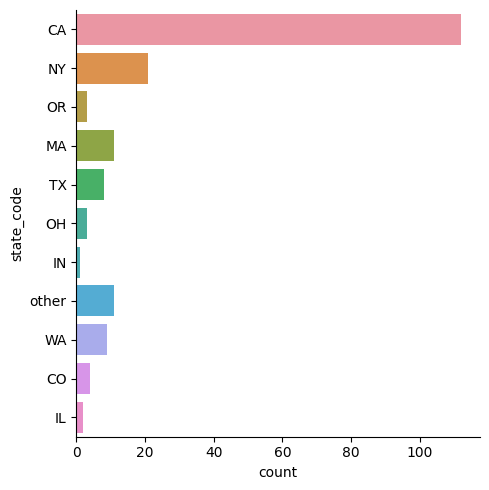

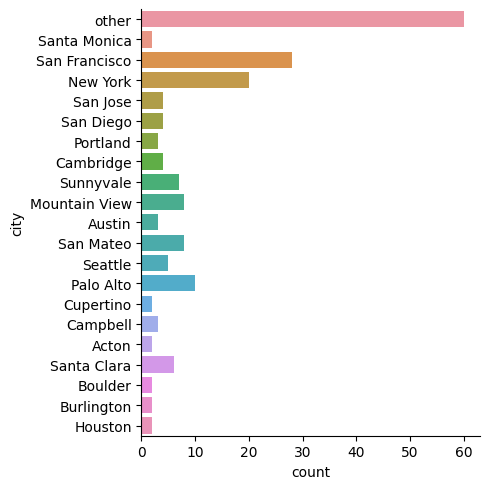

In [271]:
list1 = normalized_df['state_code'].value_counts().index.tolist()
normalized_df['state_code'].replace(list1[10:], 'other', inplace=True)
normalized_df['state_code'].value_counts()
# sns.catplot(data=normalized_df, y='state_code', hue= 'Target', kind='count')
sns.catplot(data=normalized_df, y='state_code', kind='count')

list1 = normalized_df['city'].value_counts().index.tolist()
normalized_df['city'].replace(list1[20:], 'other', inplace=True)
normalized_df['city'].value_counts()
# sns.catplot(data=normalized_df, y='city', hue= 'Target', kind='count')
sns.catplot(data=normalized_df, y='city', kind='count')

We now changed the state code and the city attributes from string to int

In [272]:
normalized_df['state_code'] = pd.factorize(normalized_df['state_code'])[0]
normalized_df['city'] = pd.factorize(normalized_df['city'])[0]

In [273]:
normalized_df['state_code'].value_counts()
normalized_df['city'].value_counts()

city
0     60
2     28
3     20
13    10
9      8
11     8
8      7
17     6
12     5
4      4
5      4
7      4
15     3
10     3
6      3
14     2
1      2
16     2
18     2
19     2
20     2
Name: count, dtype: int64

We changed the Target attribute to be binary 1 and 0

In [274]:
# normalized_df['Target'] = normalized_df['Target'].astype('category').cat.codes

We want to look again at all the statists of the attributes

In [275]:
# df_numeric = normalized_df.select_dtypes(include=numerics)
# df_numeric['Target'] = normalized_df['Target'].astype('category').cat.codes

# fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20), sharex=False, sharey=False)
# axes = axes.ravel()  # array to 1D
# cols = df_numeric.columns[:-1]  # create a list of dataframe columns to use

# for col, ax in zip(cols, axes):
#     data = df_numeric[[col, 'Target']]  # select the data
#     sns.histplot(data=data, x=col, hue='Target', fill=True, ax=ax)
#     ax.set(title=f'{col}', xlabel=None)

# ###fig.delaxes(axes[18])  # delete the empty subplot
# ###fig.delaxes(axes[19])  # delete the empty subplot
# fig.tight_layout()

In [276]:
normalized_df.to_csv('test_preprocessed.csv')

# Attributes correlations

In [277]:
# normalized_df.corr(method = 'pearson')
# f, ax = plt.subplots(figsize=(8, 7))
# ax = sns.heatmap(normalized_df.corr(), annot = True, vmin=-1, vmax=1, center= 0,
#             cmap= "RdGy", linewidths=0.5, linecolor='black', annot_kws={'fontsize':8}, fmt='.2f')

# Intresting relations visualizations

We want to see if having lots of connections affect the probability for the startup to success

In [278]:
# sns.boxplot(data=normalized_df, x="Target", y="connections")

We saw surprisingly high corraltion between milestone and connnection atrribute

In [279]:
# grid = sns.FacetGrid(normalized_df, col="milestones")
# grid.map(sns.histplot, "connections")
# grid.add_legend

We saw as expect high corraltion between funding_rounds and total_funding

In [280]:
# sns.boxplot(data=normalized_df, x='funding_rounds', y='total_funding')

We saw as expected that there was a corraltion between the ages attributes so we will show th in distribution graphsere distrbit

In [281]:
# df_ages = normalized_df[["first_funding_age", "last_funding_age", "first_milestone_age", "last_milestone_age", "Target"]]
# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=False, sharey=False)
# axes = axes.ravel()  # array to 1D
# cols = df_ages.columns[:-1]  # create a list of dataframe columns to use

# for col, ax in zip(cols, axes):
#     data = df_ages[[col, 'Target']]  # select the data
#     sns.kdeplot(data=data, x=col, hue='Target', fill=True, ax=ax)
#     ax.set(title=f'{col}', xlabel=None)

# fig.tight_layout()

# PCA

We will do the PCA algorithm and show its results in a graph

In [282]:
# pca = PCA(n_components = 0.99, svd_solver = 'full') 
# pca.fit(normalized_df, y='Target')
# df2 = pd.DataFrame(pca.transform(normalized_df))

In [283]:
# colordict = {0: 'rebeccapurple', 1: 'g'}
# plt.scatter(df2[2], df2[2], c = normalized_df['Target'].map(colordict))